# Data Science Nigeria: Introductory Machine Learning Training

<img src='Images/DSN.jpg' alt = "Data Science Nigeria" style="width:600; height:300"/>


## Unsupervised Machine Learning Model

### Clustering

what is clustering in machine learning?


Clustering is similar to classification, but the basis is different. In Clustering, you dont know what you are looking for, and you are trying to identify some segments or clusters in your data. When you use clustering algorithms on your dataset, unexpected things can suddenly pop uplike structures, clusters and groupings you would have never thought of.

### 1. K-Means Clustering


# What is K-Means Clustering ??

Clustering means grouping things which are similar or have features in common and so is the purpose of k-means clustering. K-means clustering is an unsupervised machine learning algorithm for clustering ’n’ observations into ‘k’ clusters where k is predefined or user-defined constant. The main idea is to define k centroids, one for each cluster.

# How the K-means algorithm works
To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids
It halts creating and optimizing clusters when either:
The centroids have stabilized — there is no change in their values because the clustering has been successful.
The defined number of iterations has been achieved.

![title](images/image1.png)

![title](images/image2.png)

Note that all this are done within the model algorithm so you need not to worry about this but its okay for you to be aware of this 

# How do we choose the right number of cluster 

![title](images/image9.png)

this is with k = 3

what if we choose k = 4 or 5 or ..................
how do we know the best number of cluster to use 


we should be able to set some metrics that we can quantify and use to know if the number of clusters is perfect for a particular problem 
this metric is 
WCSS(within cluster sum of squares)

![title](images/image10.png)

![title](images/image11.png)

![title](images/image12.png)

![title](images/image13.png)

![title](images/image14.png)

# lets practise

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')

You are owing a supermarket mall, you have some basic data about your customers that like 

* Customer ID 
* Age 
* Gender
* Annual income a
* and spending score. 

The closer the **Spending Score** gets to 100, the more the customer spends. It is something you assign to the customer based on your defined parameters like **customer behavior and purchase data***.

### Problem Statement 

You own the mall and want to understand the customers who can be easily targeted for new stock of goods so that the insight can be given to marketing team and plan the strategy accordingly.


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### To check if the dataset contains missing values

In [4]:
print(dataset.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


### It appears theres a mistake in Representation of Gender Feature, Pandas .rename() method can fix that easily

In [3]:
dataset.rename({"Genre": "Gender"}, axis = 1, inplace =True)
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Value count of Gender
dataset['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

### Data Preprocessing

In [5]:
#creating a LabelEncoder object
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
#invoking fit_transform method on object
dataset['Gender']=le.fit_transform(dataset['Gender'])

dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# lets do some Descriptive statistics and visualization

In [6]:
#Value count of gender after transformation
dataset['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

In [7]:
type(dataset['Gender'])

pandas.core.series.Series

### Here we plot the count of Male and Female customer

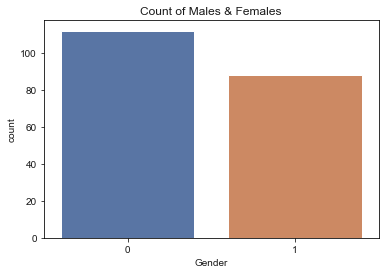

In [8]:
#Count of males & females
plt.title('Count of Males & Females')
sns.set(style="darkgrid")
sns.countplot(x = dataset['Gender'])

In [11]:
#Overall descriptive statistic of the dataset
dataset.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


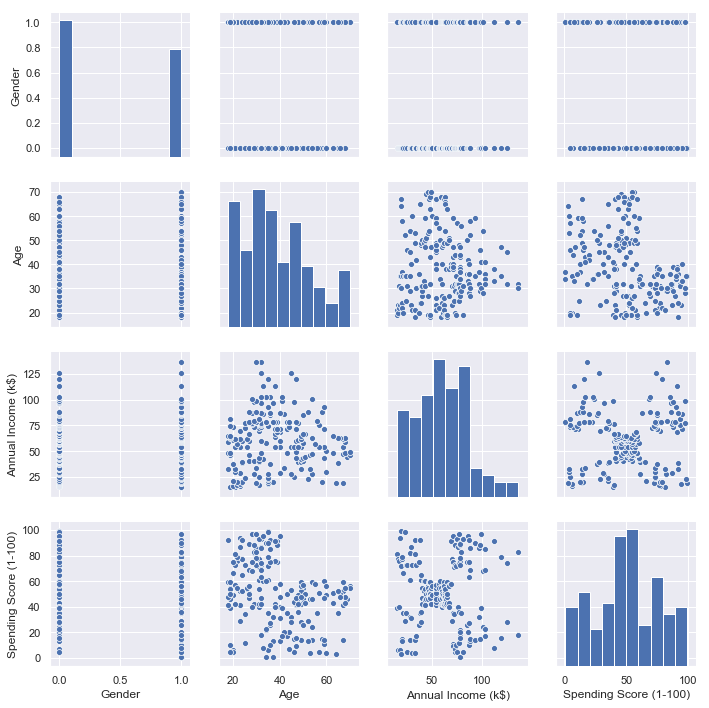

In [9]:
#Finding correlation between features of the dataset
sns.pairplot(dataset.iloc[:,1:5])

## Identifiable conlusions from the pairplot

The pair plot shows that middle-aged people earn the most and young to middle-aged people spend the most. Thus they are a good target to focus for new products and advertisement.
Spending and earning are more or less uniform for both the genders, so gender neutral products will probably have a good market.
Spending Score and Annual income has clear clusters, thus they are good features which can be considered for clustering the customers

Female customers We can see that the male customers registered for membership card is about 90, while female customers are about 110. 

In [10]:
X = dataset.iloc[:, [3, 4]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [14]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# whats the best value of k will you set as a data scientist ???

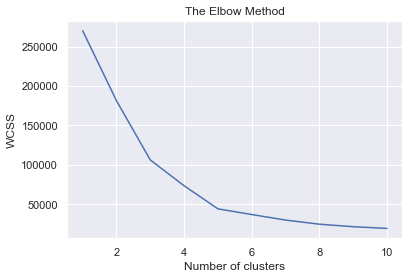

In [11]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):  #Test 1 to 10 differnt clusters
#Loop over the indented statements 10 times to see how distance reduces till it becomes steady 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)  #Train the model for all the 10 clusters and append into wcss list
    
    '''kmeans.fit(X) generates the following parameters:
    KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto', random_state=42, tol=0.0001, verbose=0)
    inertia: Sum of squared distances of samples to their closest cluster center'''
    
    wcss.append(kmeans.inertia_) #Add each Sum of squared distances to wcss[] list
    
plt.plot(range(1, 11), wcss) # plot the ten different wcss against the number of clusters
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**The Sum of squared distances started to stabilize from the 5th cluster. Therefore, the best number of clusters (k) in this task is 5**

In [12]:
# Fitting  K-Means to the dataset and predicting the clusters
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
#The predicted cluster centers are stored in y_kmeans

In [13]:
#Adding the predicted clusters
X['Centroids'] = y_kmeans

#Now, different observations has been assigned to different cluster centers (centroids)
X

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Annual Income (k$),Spending Score (1-100),Centroids
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
5,17,76,3
6,18,6,2
7,18,94,3
8,19,3,2
9,19,72,3


## Visualising the clusters

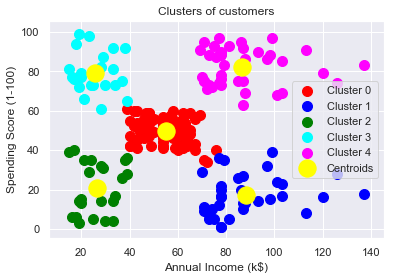

In [14]:
# unzip all values for all column in X DataFrame and store them in x(array)
x = X.values


# x[y_kmeans == 0, 0] is a conditional statement that prints the value of x[i] for all i in X, only if where y_kmeans ==0
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend() #Show labels in all scatter plots as legend
plt.show()

# s = size of points
# c = color
# label = legend for cluster 1,2,3,4,5


#x[y_kmeans == 0, 0] #equivalent to X[X.Centroids == 0]['Annual Income (k$)'] All annual income belonging to cluster center 0'''
#x[y_kmeans == 0, 1] #equivalent to X[X.Centroids == 0]['Spending Score (1-100)'] All spending score belonging to cluster center 0'''
#Plt.scatter(x[y_kmeans == 0, 0] ,x[y_kmeans == 0, 1]) Plots All annual income belonging to cluster centre 0 (X-axis) against All spending score belonging to cluster center 0 (y-axis)'''


# x[y_kmeans == 1, 0] equivalent to X[X.Centroids == 1]['Annual Income (k$)'] -> All annual income belonging to cluster centre 1
# x[y_kmeans == 1, 1] equivalent to X[X.Centroids == 1]['Spending Score (1-100)'] -> All spending score belonging to cluster center 1
#Plt.scatter(x[y_kmeans == 1, 0] ,x[y_kmeans == 1, 1]) -> Plots All annual income belonging to cluster centre 1 (X-axis) against All spending score belonging to cluster center 1 (y-axis)


# x[y_kmeans == 2, 0] equivalent to X[X.Centroids == 2]['Annual Income (k$)'] -> All annual income belonging to cluster centre 2
# x[y_kmeans == 2, 1] equivalent to X[X.Centroids == 2]['Spending Score (1-100)'] -> All spending score belonging to cluster center 2
#Plt.scatter(x[y_kmeans == 2, 0] ,x[y_kmeans == 2, 1]) -> Plots All annual income belonging to cluster centre 2 (X-axis) against All spending score belonging to cluster center 2 (y-axis)


# x[y_kmeans == 3, 0] equivalent to X[X.Centroids == 3]['Annual Income (k$)'] -> All annual income belonging to cluster centre 3
# x[y_kmeans == 3, 1] equivalent to X[X.Centroids == 3]['Spending Score (1-100)'] -> All spending score belonging to cluster center 3
#Plt.scatter(x[y_kmeans == 3, 0] ,x[y_kmeans == 3, 1]) -> Plots All annual income belonging to cluster centre 3 (X-axis) against All spending score belonging to cluster center 3 (y-axis)


# x[y_kmeans == 4, 0] equivalent to X[X.Centroids == 4]['Annual Income (k$)'] -> All annual income belonging to cluster centre 4
# x[y_kmeans == 4, 1] equivalent to X[X.Centroids == 4]['Spending Score (1-100)'] -> All spending score belonging to cluster center 4
#Plt.scatter(x[y_kmeans == 4, 0] ,x[y_kmeans == 4, 1]) -> Plots (on X-axis), All annual income belonging to cluster centre 4 against All spending score belonging to cluster center 4 (on y-axis)


#kmeans.cluster_centers has been generated for when we fit(train) the model
# kmeans.cluster_centers_[:, 0] array of cluster centers in all rows(observations) under the first column (Annual Income (k$))
# kmeans.cluster_centers_[:, 1] array of cluster centers in all rows(observations) under the second column (spending score (k$))

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])
#plot array of clusters of observations in (Annual Income (k$)) against array of clusters of observations (spending score (k$))

In [15]:
print(x[0:5, :]) #Print the first 5 rows of X and all column
print ("Data type of x= ", type(x), 'with shape', x.shape)
print ("Data type of X DataFrame= ", type(X), 'with shape', X.shape)

[[15 39  2]
 [15 81  3]
 [16  6  2]
 [16 77  3]
 [17 40  2]]
Data type of x=  <class 'numpy.ndarray'> with shape (200, 3)
Data type of X DataFrame=  <class 'pandas.core.frame.DataFrame'> with shape (200, 3)


* **X and x has 200 rows :** The total number of customers under consideration**
* **3 columns:** The features under consideration i.e **Annual Score** and **income spending and the predicted(Centroids)**

## The above visualization is the same as:

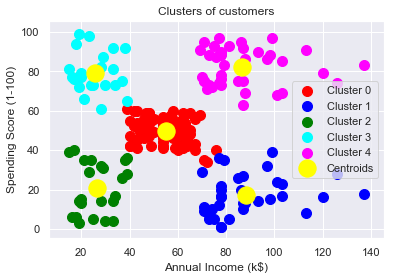

In [16]:
#Visualizing the clusters from DataFrame X

#for datapoints in cluster 0
Income_Cluster_0 = X[X.Centroids == 0]['Annual Income (k$)'] 
Spending_Score_Cluster_0 = X[X.Centroids == 0]['Spending Score (1-100)']
plt.scatter(Income_Cluster_0, Spending_Score_Cluster_0, s = 100, c = 'red', label = 'Cluster 0')

#for datapoints in cluster 1
Income_Cluster_1 = X[X.Centroids == 1]['Annual Income (k$)'] 
Spending_Score_Cluster_1 = X[X.Centroids == 1]['Spending Score (1-100)']
plt.scatter(Income_Cluster_1, Spending_Score_Cluster_1, s = 100, c = 'blue', label = 'Cluster 1')

#for datapoints in cluster 2
Income_Cluster_2 = X[X.Centroids == 2]['Annual Income (k$)'] 
Spending_Score_Cluster_2 = X[X.Centroids == 2]['Spending Score (1-100)']
plt.scatter(Income_Cluster_2, Spending_Score_Cluster_2, s = 100, c = 'green', label = 'Cluster 2')

#for datapoints in cluster 3
Income_Cluster_3 = X[X.Centroids == 3]['Annual Income (k$)'] 
Spending_Score_Cluster_3 = X[X.Centroids == 3]['Spending Score (1-100)']
plt.scatter(Income_Cluster_3, Spending_Score_Cluster_3, s = 100, c = 'cyan', label = 'Cluster 3')


#for datapoints in cluster 4
Income_Cluster_4 = X[X.Centroids == 4]['Annual Income (k$)'] 
Spending_Score_Cluster_4 = X[X.Centroids == 4]['Spending Score (1-100)']
plt.scatter(Income_Cluster_4, Spending_Score_Cluster_4, s = 100, c = 'magenta', label = 'Cluster 4')


#Plot all cluster centroids on their converged datapoints 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

#Give the figure a title called Clusters of customers
plt.title('Clusters of customers')

#Name the X-axis as Annual Income (k$)
plt.xlabel('Annual Income (k$)')

#name the X-axis as Annual Income (k$)
plt.ylabel('Spending Score (1-100)')

#Print all labels in various scatter plots
plt.legend()

#Show all the plots
plt.show()

# ASSIGNMENT

## what can you infer from the plot above?